# Machine Learning - Common Algorithms

Instead of going much deeper into the theory of what machine learning is, we will simply have a look at a few very common algorithms every well-trained data scientist should know about. Some of them remain standard items in our everyday toolbox and you will most likely apply them every now and then. Others are important because they reflect key concepts in machine learning algorithms and help you gain a more fundamental understanding of what is actually happening under the hood.

## k-nearest neighbors (k-NN)
**$k$-nearest neighbors** is for very good reasons one of the most commonly known machine learning algorithms. It is relatively intuitive and simple, yet still powerful enough to find plenty of use cases even today (despite havine much fancier techniques on the market).

The algorithm works as follows ({numref}`fig_knn_algorithm`). For any given data point $x$, do the following:
- Search for the $k$ nearest neighbors within the known data.
- For classification: take the most common label of those $k$ data points.
- For regression: take the mean (or median) of those $k$ data points.

That's essentially it, which means it is no more complicated than what was sketched in {numref}`fig_predictions_already_done`B. One could ask if the terms "training" or "learning" are very good in this context. But one could essentially just argue that the data provided for reference is available and hence "learned". The algorithm is clearly a machine learning algorithm because we only define the process. The respective outcomes will be fully dependent on the provided reference data.

```{figure} ../images/fig_knn_algorithm.png
:name: fig_knn_algorithm

k-nearest neighbors is a rather intuitive algorithm. It is fully distance based and relies on finding the $k$ nearest neighbors within the reference data. Out of those data points the final prediction is generated, either by majority vote (classification) or by averaging (regression).
```

---

### Pros, Cons, Caveats
Conceptually, the k-nearest neighbors algorithm is rather simple and intuitive. However, there are a few important aspects to consider when applying this algorithm.

First of all, k-nearest kneighbors is a distance-based algorithm. This means that we have to ensure that closer really means "more similar" which is not as simple as it maybe sounds. We have to decide on a *distance metric* that is the measure (or function) by which we calculate the distance between data points. We can use common metrics like the Euclidean distance, but there are many different options to choose from.
Even more critical is the proper *scaling* of our features. Just think of an example. We want to predict the shoe size of a person from the person's height (measured in $m$) and weight (measured in $kg$). This means that we have two features here, height and weight. For a prediction on a new person we simply need his/her height and weight. Then k-NN will compare those values to all known ("learned") data points in our model and find the closest $k$ other people. If we now use the Euclidean distance, the distance $d$ will simply be

$$
 d = \sqrt{(w_1 - w_2) ^ 2 + (h_1 - h_2) ^ 2}
$$
where $w$ and $h$ are the weights and heights of person 1 and 2.

Try to answer the following question: What is the problem here?

...?

Ok. The issue here is, that the weights are in kilograms ($kg$), so we are talking about values like 50, 60, 80, 100. The height, however, is measured in meters ($m$) such that values are many times smaller. As a result, having two people differ one meter in height (which is a lot) will count no more than one kilogram difference (which is close to nothing). Clearly not what we intuitively mean by "nearest neighbors"!

The solution to this is a proper **scaling** of our data. Often, we will simply apply one of the following two scaling methods:
1. MinMax Scaling - this means we linearly rescale our data such that the lowest occuring value becomes 0 and the highest value becomes 1.
2. Standard Scaling - here we rescale our data such that the mean value will be 0 and the standard deviation will be 1.

Both methods might give you values that look awkward at first. Standard scaling, for instance, gives both positive and negative values so that our height values in the example could be -1.04 or +0.27. But don't worry, the scaling is really only meant to be used for the machine learning algorithm itself.

Once we scaled our data, and maybe also picked the right distance metric (or used a good default, which will do for a start), we are technically good to apply k-NN.

But there are still some questions we need to consider.

The obvious one is: What should we use as $k$?  
This is the model's main parameter and we are free to choose any value we like. And there is no simple best choice that always work. In practice the choice of $k$ will depend on the number of data points we have, but also the distribution of data and the number of classes or parameter ranges. We usually want to pick odd values here to avoid draws as much as possible (imagine two nearest neighbors are "spam" and two are "no-spam"). But whether 3, 5, 7, or 13 is the best choice will depend on our specific task at hand. 


In machine learning we call such a thing a **fitting parameter**. This means that we are free to change its value and it might have a considerable impact on the quality of our predictions, or our "model performance". Ideally we would compare several different models with different parameters and pick the one that performs best.

Let's consider a situation as in {numref}`fig_knn_caveats`A. Here we see that a change in $k$ can lead to entirely different predictions for certain data points. In general, kNN predictions can be highly unstable close to border regions, and they also tend to be highly sensitive to the local density of data points. The later can be a problem if we have far more points of one category than for another.

```{figure} ../images/fig_knn_caveats.png
:name: fig_knn_caveats

k-nearest neighbors has a few important caveats. **A** its predictions can change with changing $k$, and generally are very density sensitive. **B** it suffers (as many machine learning models) from overconfidence, which simply means that it will confidently output predictions even for data points that are entirely different from the training data (or even physically impossible).
```

Finally, another common problem with kNN -but also many other models- is called **over-confidence** ({numref}`fig_knn_caveats`B). The algorithm described here creates its predictions on the $k$ closest neighbors. But for very unusual inputs or even entirely impossible inputs, the algorithm will still find $k$ closest neighbors and make a prediction. So if you ask for the shoe size of a person of 6.20m and 840 kg your model might confidently answer your question and say: 48 (if nothing bigger occurred in the data). So much for the "intelligent" in *artificial intelligence* ...

In summary, k-NN has a number of Pros and Cons:

**Pros**  
- Can be used for classification and regression
- Very intuitive, which also means that the predictions are easy to explain!
- No overfitting (we will soon see what this is)
- Does not make impossible predictions (because it only takes values from the training data)

**Cons**  
- Predictions are sensitive to local density of data points and the choice of $k$
- Can suffer from over-confidence.
- Does not scale well for very large datasets (computing all distances can take very long)

## A first Hands-on Example

To get a better sense of how machine learning is done in practice with Python, let us work on a simple example.
For this, we will use the [`Penguin Dataset`](https://allisonhorst.github.io/palmerpenguins/) {cite}`penguins` that consists of data from three different penguin species.

The machine learning goal in this section will be to create models that can predict the species from the penguins body features.
This means that the species information will later be our *label*.

We start by importing and inspecting the dataset:

In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

### Data Inspection & Cleaning

In [27]:
filename = "../datasets/penguins_size.csv"  # contains some changes with respect to the original dataset!
data = pd.read_csv(filename)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We will first remove the `NaN` entries.  
Then, we will inspect the data using both `info()` and `describe()`.

In [28]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [16]:
data.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334,334,334.000000,334.000000,334.000000,334.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,146,164,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.994311,17.160479,201.014970,4209.056886,NaN
std,NaN,NaN,5.460521,1.967909,14.022175,804.836129,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.575000,18.700000,213.000000,4793.750000,NaN


### Data Exploration

We have already seen multiple ways to explore the data and the relationship between the different features in more detail.
Here, we will focus on the correlations and the actual plots between two features to get a better intuition.

First, we use `.corr(numeric_only=True)` to compute the correlation coefficients between all numeric features.

<Axes: >

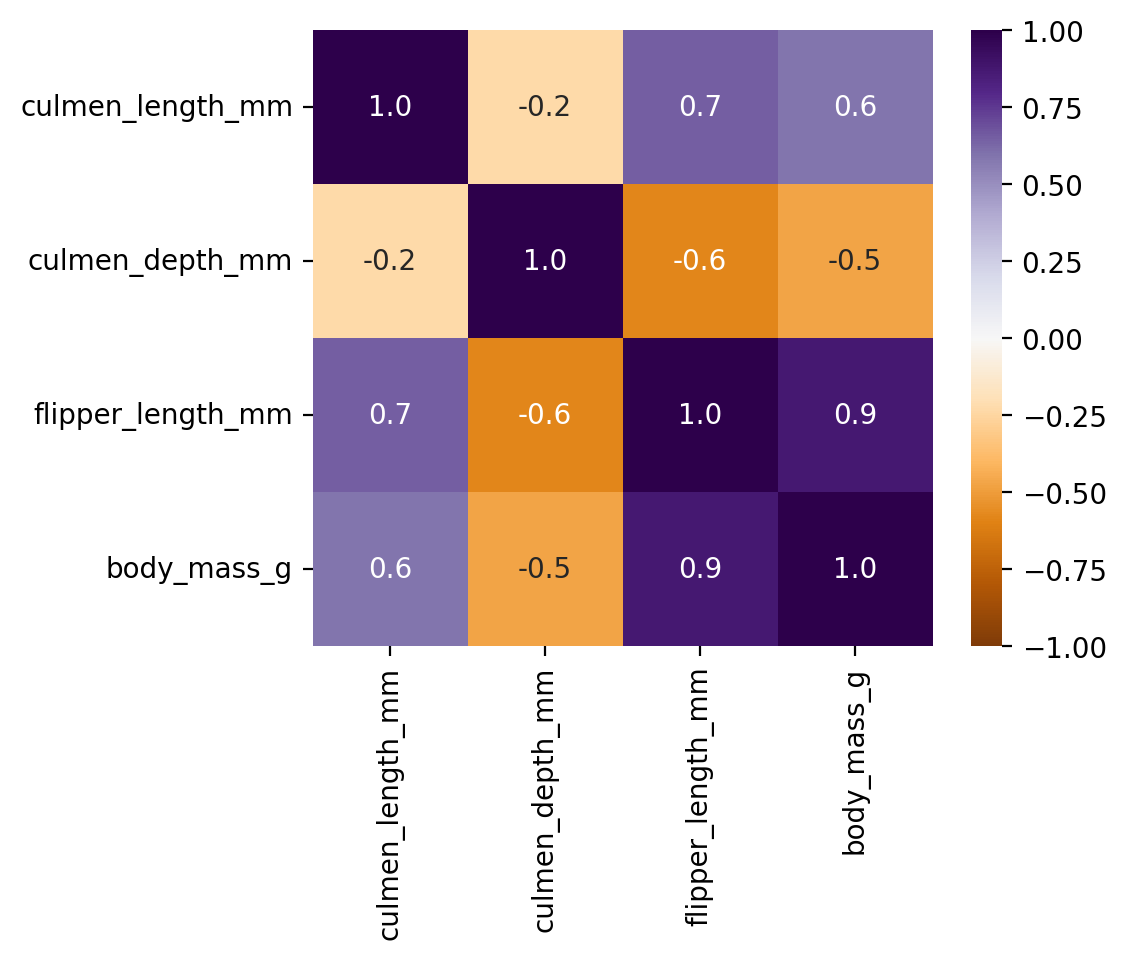

In [22]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=200)

sb.heatmap(data.corr(numeric_only=True),
           annot=True,
           cmap="RdBu",
           fmt=".1f",
           vmin=-1, vmax=1)

This plot shows us that many of the features are highly correlated.  
Unfortunately, however, this plot does not help to better understand how we could make predictions regarding the penguin species.  

What works better in this context is a `pairplot` from `Seaborn`:

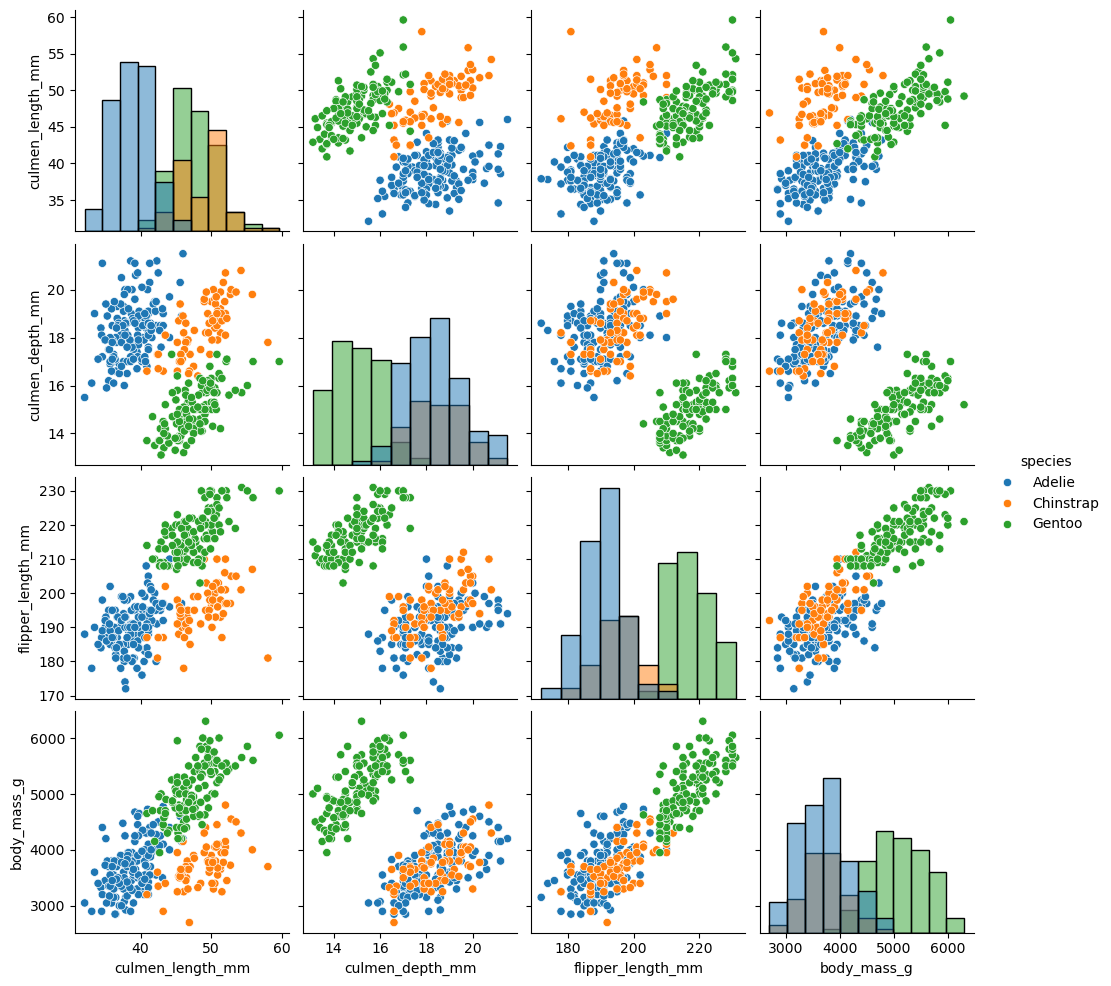

In [17]:
sb.pairplot(data, hue="species", diag_kind="hist")

Look at this plot and ask yourself the question: Can we predict the species based on the shown body features?

The answer here must be a clear "yes", because several plot panels show a clear visual distinction between the penguin species. If this is the case, we can ususally expect that this task is rather simple to learn for a machine learning model.

### Prepare Data for Training

We have inspected, cleaned, explored the data. But it is not yet ready to be used for training a machine learning model.
The precise process will depend on our goal (here: predicting species), the data, but also the choice of our model.

First, we will split the labels from the data. But we should also remove features which rather belong to the labels than to the data. In the present case this would be the column `island` which happens to correlate perfectly with the `species`.

In [29]:
y = data["species"]
X = data.drop(["species", "island"], axis=1)

In [30]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


### Convert to Numerical Values

Many machine learning models, including k-NN, require numerical inputs. In the case of k-NN this is needed to compute the distances between data points. In our present data, however, we have the column `sex` that contains strings.

We now can choose to either remove the column, or to convert it to numerical values. The later is not always possible, but if entries belong to a limited number of catogeries we can use `one-hot-encoding`. This is the conversion of categorical features to binary features.

In [31]:
X["sex"] = 1 * pd.get_dummies(X["sex"])["FEMALE"]
X = X.rename(columns={"sex": "female"})
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,female
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0


### Train/Test split

As mentioned before, this split is crucial for all supervised machine learning processes. It will later allow us to evaluate the model.
Two things are important for this split. We should shuffle the data since it might be ordered (for instance alphabetically or chronologically). But we should make 100% sure that we shuffle both our labels and our data in extactly the same way. If not, the order of our labely $y$ will not match the order of our data $X$ anymore, which is a disaster and a common cause for failing machine learning processes.

This would be relatively easy to implement ourselves. But why reinventing the wheel? From this point on we can luckily rely on a very extensive machine learning library for Python: [`Scikit-Learn`](https://scikit-learn.org/stable/).

In [33]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
# Let's check the outcome dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((250, 5), (84, 5), (250,), (84,))

### Data Scaling

As discussed above, we need scaled data when we use k-NN models to make sure that each feature is considered equally.  
This, again, is already implemented in Scikit-Learn.

One important note here: The scaling is adjusted **only** based on the training data, but not on the test data. This is the only way that we can mimick a real-life situation of having known data (X_train) and unknown data (X_test).

In [36]:
from sklearn.preprocessing import StandardScaler

# Scale
scaler = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [38]:
# Values get a bit weird through scaling ... but we do this for the model, not for us :)
X_train.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,female
0,1.005441,-0.175087,2.020825,1.831341,-0.945484
1,-2.041019,-0.520914,-1.709753,-1.684432,1.057660
2,0.768292,-1.064356,1.231665,0.764053,1.057660
3,1.078410,-1.410183,1.159923,1.831341,-0.945484
4,0.804776,-1.508991,0.585988,0.261800,1.057660


### Train a model (and make predictions)

Now we finally get to use a k-nearest neighbors model! As most of the commonly used machine learning models, this is implemented in Scikit-Learn which makes this fairly easy to use for us, see also [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier).

The key parameter ($k$) is here called `n_neighbors`.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
knn.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [40]:
prediction_species = knn.predict(X_test)
prediction_species

array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap'], dtype=

### Model evaluation

We could of course manually compare the predictions we just generated with the actual true values (`y_test`), but I guess it is obvious that this is not the best way to do things. In particular, because we usually work with much larger datasets.

One of the most common and best ways to assess if a classification model performes well is to compute a **confusion matrix**.  
This matrix will compare all predictions to all true values and make a summary.

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction_species)

array([[42,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 26]], dtype=int64)

<Axes: >

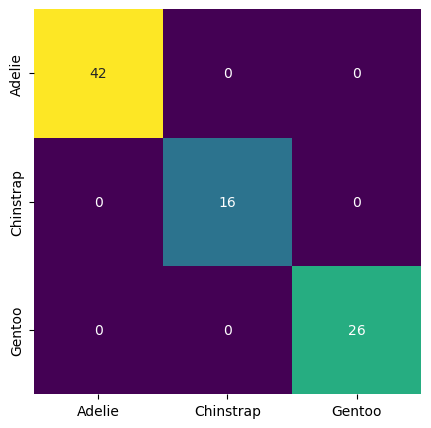

In [43]:
# or, visually a bit nicer:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test, prediction_species),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=knn.classes_,
           yticklabels=knn.classes_)

What you should see is a confusion matrix that represents perfect (or near perfect) predictions. In many real world examples our confusion matrix will not look like this, but also show all types of misclassifications.

Still to come:
- linear regression
- logistic regression
- decision trees
- random forests

### Want to read more on this?

- https://github.com/GeostatsGuy/PythonNumericalDemos/tree/master
- https://inferentialthinking.com/chapters/intro.html#
- https://inria.github.io/scikit-learn-mooc/index.html